# Apprentissage Non Supervisé
maniére de donner à la machine la structure des données X pour apprendre elle meme et réaliser certaines tâches

### Clustering
Laisser la machine apprendre à classer les données selon leurs ressemblance : 
#### Algorithme de K-means Clustering

In [21]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

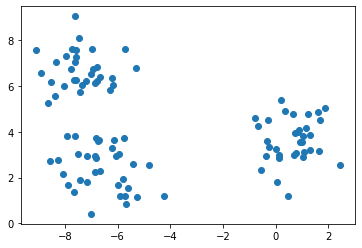

In [75]:
# Generer les données
X,y = make_blobs(n_samples = 100,centers = 3,cluster_std=1.0)
plt.scatter(X[:,0],X[:,1])

In [76]:
from sklearn.cluster import KMeans

161.85688946248655

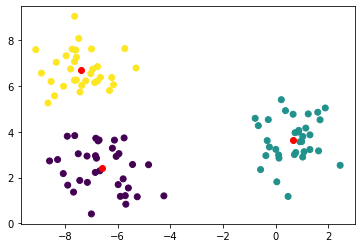

In [80]:
model = KMeans(n_clusters = 3)
model.fit(X)
model.labels_
model.predict(X)
plt.scatter(X[:,0],X[:,1],c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='r')
model.inertia_

In [84]:
inertia = []
k_range = range(1,20)
for k in k_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

Text(0, 0.5, 'Cout (inertie)')

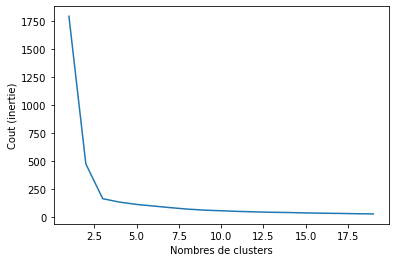

In [92]:
plt.plot(k_range,inertia)
plt.xlabel('Nombres de clusters')
plt.ylabel('Cout (inertie)')

### Anomaly Detection

Technique d'apprentissage non supervisé permettant de detecter les echantillons
dont les caractériques X sont très éloignés des autres échantillons : 
#### Algorithme de Isolation Forest


In [34]:
X,y = make_blobs(n_samples=50,centers=1,cluster_std=0.6)
X[-1,:] = np.array([2.25,5])

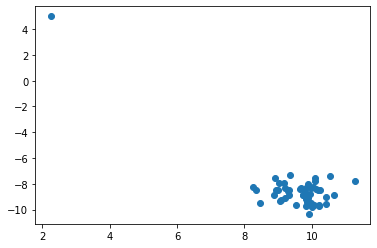

In [35]:
plt.scatter(X[:,0],X[:,1])

In [36]:
from sklearn.ensemble import IsolationForest

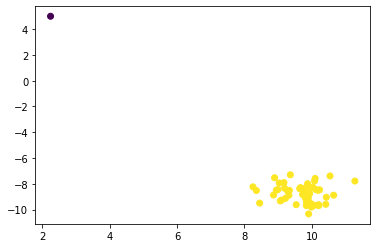

In [40]:
model = IsolationForest(contamination = 0.01)
model.fit(X)
plt.scatter(X[:,0],X[:,1],c=model.predict(X))

#### Application Decontamination Digits

In [42]:
from sklearn.datasets import load_digits

In [50]:
digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

Text(0.5, 1.0, '4')

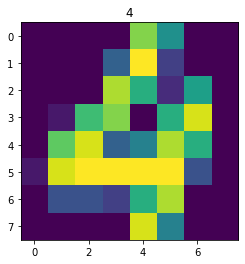

In [72]:
model = IsolationForest(random_state=0,contamination=0.02)
model.fit(X)
model.predict(X)
outliers = model.predict(X) == -1
plt.imshow(images[outliers][35])
plt.title(y[outliers][35])

### Reduction de la dimentionalité
#### Algorithme de ACP
le principe est de projeter les données sur des axes appelés Composantes principales en cherchant à minimiser la distance entre les points et leurs projections


In [73]:
from sklearn.decomposition import PCA

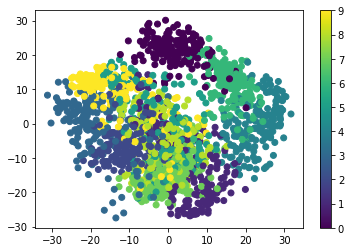

In [85]:
# Visualisation dans un espace 2D
model = PCA(n_components=2)
X_reduit = model.fit_transform(X)
plt.scatter(X_reduit[:,0],X_reduit[:,1],c=y)
plt.colorbar()

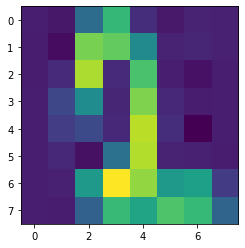

In [113]:
# Compression a 99 ou 95%
model = PCA(n_components=0.95)
X_compressé = model.fit_transform(X)
X_recover = model.inverse_transform(X_compressé)
plt.imshow(X_recover[12].reshape((8,8)))

In [118]:
# components necessaire pour atteindre le pourcentage souhaité
model.n_components_

29